<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Aleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
=========================================================
LAB I - Condução de Calor em Aletas
Ajuste de curvas usando Python
Encontra o valor do coeficiente de convecção médio 
que opera na aleta a partir dos dados experimentais medidos
e compara dois possíveis modelos matemáticos do processo

©2022 Prof. Ricardo V. P. Rezende - DEQ/UEM
=========================================================
"""

# importando bilbiotecas para :
# criar vetores e matrizes;
# chamar funções matemáticas;
# manipular e operar tabela de dados;
# apresentação gráfica dos dados e resultados;
# otimização de parâmetros de ajuste;

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
#importando um drive de conteúdo dentro do Goggle Drive Pessoal

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importando dados de temperaturas das aletas
# !!! deve-se fornecer todo o caminho e os dados devem estar no formato CSV!!!!
# outros formatos são aceitos, mas deve-se trocar a linha de comando parta o tipo adequado

df= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/aleta_data.csv')

In [ ]:
#convertando para o tipo 'float' (para o Python tudo é apenas texto quando ele importa o arquivo )

df = df.astype(float)

#inspecionando a tebela -dataframe: df 
df


,x,Temp
0,0.0,96.0
1,30.1,88.0
2,80.2,79.0
3,150.6,72.0
4,239.7,63.0
5,359.1,54.0
6,529.2,49.0
7,753.0,45.0


In [ ]:
# Repassando a coluna x para um vetor xdata e y para ydata

xdata = df['x']
ydata = df['Temp']

In [ ]:
# convertendo x de [mm]  para m xdata = xdata/1000
xm = xdata/1000.0

#inspecionando o resultado
xm, ydata

(0    0.0000
 1    0.0301
 2    0.0802
 3    0.1506
 4    0.2397
 5    0.3591
 6    0.5292
 7    0.7530
 Name: x, dtype: float64, 0    96.0
 1    88.0
 2    79.0
 3    72.0
 4    63.0
 5    54.0
 6    49.0
 7    45.0
 Name: Temp, dtype: float64)

In [ ]:
# Deve-se então converter Temp para Theta
# temperatura ambiente "T infinito"

T_oo = 27.0  # Este valor é medido na bancada experiemntal 

#conversão
ytheta= ydata - T_oo

# inspecionando o resultado
ytheta

0    69.0
1    61.0
2    52.0
3    45.0
4    36.0
5    27.0
6    22.0
7    18.0
Name: Temp, dtype: float64

In [ ]:
# inspecionando graficamente os pontos experimentais
# OBS.: há muito código de formatação

#tamanho da figura
plt.figure(figsize=(10,5.625))

#tipo de gráfico ( dispersão de pontos - scatter)
plt.scatter(xm, ytheta, s=100, label = 'Dados Experimentais', \
            c = ytheta, cmap ='hot', linewidth =2,alpha=0.7, edgecolors='black')        

#titulo do Gráfrico
plt.title('Perfil de Temperatura na Aleta')

#limites dos eixos 
plt.xlim([-0.01, 0.8])
plt.ylim([-0.01, 100])

#título do eixo x 
plt.xlabel('X [m]', size=14)

#título do eixo y em LATEX
plt.ylabel(r'$\theta$', size =14)

#mostrar linhas de grade
plt.grid()

#mostrar legenda no gráfico
plt.legend()

#barra do mapa de cor
plt.colorbar()

#limites dos valores a serem mostrados na barra de cor
plt.clim(0, 80);

#salvando uma figura
plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/Fig1_dados_experimentais.png', format='png', dpi=600, facecolor='white',transparent=False)

#mostre todos os elementos juntos agora!
plt.show()

NameError: ignored

In [ ]:
# definindo a função a ser ajustada e seus parâmetros

"""" Modelo 1 : C. C com Temperatura prescrita  na ponta
    theta(x) = theta_o*exp(-m*x)
    m é desconhecido, deve ser fixado como estimativa antes de otimizar!
""""

def modelo1(x,m):
    """"
    theta_o não pode ser alterada durante a otimização
    a definição dela como 'global' indica que é um parâmetro externo e com valor fixado 
    assim, a rotina de otimização não atuará sobre ela
    restando apenas o m 
    """"
   
    global theta_o
    
    # ela retorna um vetor de valores da função ( por isto np. está ali!!!)
    return theta_o* np.exp(-m * x)   

In [ ]:
#theta_o é o 1o valor do  vetor ytheta: 
theta_o=ytheta[0]

#escolhendo ququer valor para m (use valores que ajudem à rotina a encontrar o valor ótimo)
m1 = 1

#calculando o perfil de temperatura estimado baseado em m estimado
ymodel1 = modelo1(xm, m1)  

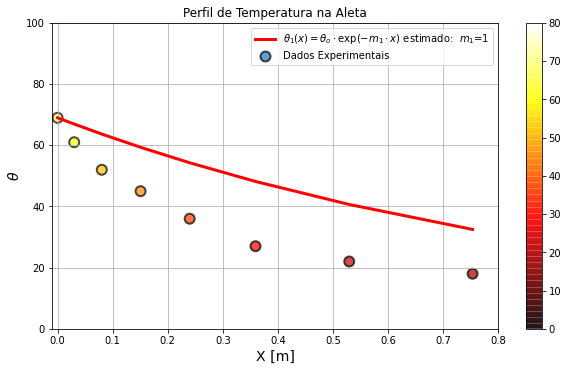

In [ ]:
# plotando modelo sem ajuste e comparando aos dados experimentais

#repetindo a formatação de figura anterior.....

#tamanho da figura
plt.figure(figsize=(10,5.625))

#tipo de gráfico ( dispersão de pontos - scatter)
plt.scatter(xm, ytheta, s=100, label = 'Dados Experimentais', c = ytheta, cmap ='hot', linewidth =2,alpha=0.7, edgecolors='black')        

#curva do modelo estimado
plt.plot(xm, ymodel1, color ='red',label =r'$\theta_{1}\left(x\right)=\theta_{o}\cdot\exp\left(-m_{1}\cdot x\right)$ estimado:  $m_{1}$='+ str(m1), linewidth=3)

# Títumo de Gráfico
plt.title('Perfil de Temperatura na Aleta')

#limites dos eixos 
plt.xlim([-0.01, 0.8])
plt.ylim([-0.01, 100])

#título do eixo y
plt.xlabel('X [m]', size=14)

#título do eixo x em LATEX
plt.ylabel(r'$\theta$', size =14)

#mostrar linhas de grade
plt.grid()

#mostrar legenda no gráfico
plt.legend()

#barra do mapa de cor
plt.colorbar()

#limites dos valores a serem mostrados na barra de cor
plt.clim(0, 80);

#salvando uma figura

plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/Fig2_modelo1_estimado.png',format='png', dpi=600, facecolor='white',transparent=False)
#mostre tosdos os elementos juntos agora!
plt.show()

In [ ]:
# chamando rotina de otimização

popt1, pcov = curve_fit(modelo1, xm, ytheta)

# m1 reecebe o valor de Parameter Optimization 1: popt1
m1 = popt1

#imprimindo o valor de m1 formatado
print("%.4f" % m1)

2.4388


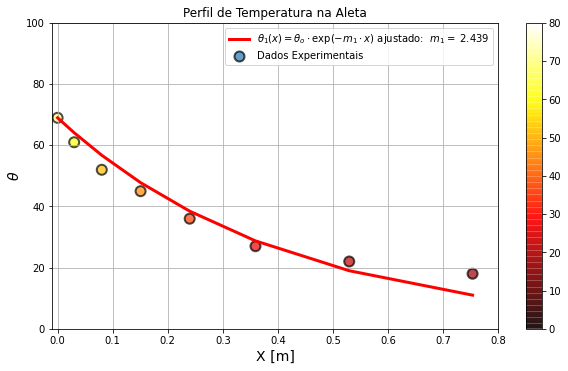

In [ ]:
# Gráfico comporativo Modelo vs. Dados

#tamanho da figura
plt.figure(figsize=(10, 5.625))

#tipo de gráfico (dispersão de pontos - scatter)
plt.scatter(xm, ytheta, s=100, label = 'Dados Experimentais', c = ytheta, cmap ='hot', linewidth =2,alpha=0.7, edgecolors='black')        

#Curva do modelo ajustado
plt.plot(xm, modelo1(xm, *popt1), 'r-', label=r'$\theta_{1}\left(x\right)=\theta_{o}\cdot\exp\left(-m_{1}\cdot x\right)$ ajustado:  $m_{1}=$ %5.3f' % tuple(popt1), color='red',linewidth=3) 

#Título do Gráfico
plt.title('Perfil de Temperatura na Aleta')

#limites dos eixos 
plt.xlim([-0.01, 0.8])
plt.ylim([-0.01, 100])

#título do eixo x em LATEX
plt.xlabel('X [m]', size=14)

#título do euxo y 
plt.ylabel(r'$\theta$', size =14)

#mostrar linhas de grade
plt.grid()

#mostrar legenda no gráfico
plt.legend()

#barra do mapa de cor
plt.colorbar()

#limites dos valores a serem mostrados na barra de cor
plt.clim(0, 80)

#salvando uma figura
plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/Fig3_modelo1_ajustado.png',format='png', dpi=600, facecolor='white',transparent=False)

#mostre todos os elementos juntos agora!
plt.show()

In [ ]:
#com o valor do gráfico, calcular h médio

#comprimento da Aleta [m]
L = 0.8119

#condutividade térmica do Alumínio[W/m.K]
k = 237

#Área da seção reta da Aleta [m²]
A = 0.0001267

#perímetro da secção reta da Aleta [m]
p = 0.0399

#coeficiente médio de transferência de calor converctivo [W/m².K]
h1 = m1*m1*k*A/p

#impressão do resultado formatado
print("%.4f" %h1,'W/m².K')

4.4760 W/m².K


In [ ]:
#Definição do 2o Modelo com ponta de Aleta Isolata
#modelo 2: theta(x) = theta_o*cosh[m(L-x)]/cosh(mL)

def modelo2(x,m):
    """"
    theta_o não pode ser alterada durante a otimização
    a definição dela como 'global' indica que é um parâmetro externo e com valor fixado 
    assim, a rotina de otimização não atuará sobre ela
    restando apenas o m 
    """"
    global theta_o
    global L
    
    # ela retorna um vetor de valores da função ( por isto np. está ali!!!)
    return theta_o*np.cosh(m*(L-x))/np.cosh(m*L)

In [ ]:
#theta_o é o 1o valor do  vetor ytheta: 
theta_o=ytheta[0]

#escolhendo ququer valor para m ( use valores que ajudem à rotina aencontrar o valor ótimo)
m2 = 1

#inspecionando se o valor escolhido é uma boa estimativa
ymodel2 = modelo2(xm, m2)  

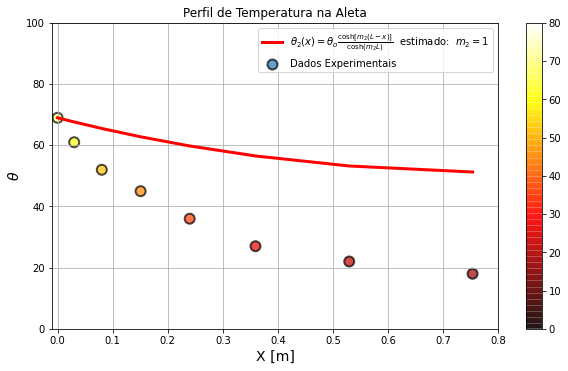

In [ ]:
# plotando modelo sem ajuste e comparando aos dados experimentais

#repetindo a formatação anterior.....

#tamanho da figura
plt.figure(figsize=(10,5.625))

#tipo de gráfico ( dispersão de pontos - scatter)
plt.scatter(xm, ytheta, s=100, label = 'Dados Experimentais', c = ytheta, cmap ='hot', linewidth =2,alpha=0.7, edgecolors='black')   

#curva do modelo estimado
plt.plot(xm, ymodel2, color ='red', label =r'$\theta_{2}\left(x\right)=\theta_{o}\frac{\cosh\left[m_{2}\left(L-x\right)\right]}{\cosh\left(m_{2}L\right)}$  estimado:  $m_{2}=$'+ str(m2), linewidth=3)

#Título do Gráfico
plt.title('Perfil de Temperatura na Aleta')

#limites dos eixos 
plt.xlim([-0.01, 0.8])
plt.ylim([-0.01, 100])

#título do eixo x 
plt.xlabel('X [m]', size=14)

#título do eixo y em LATEX
plt.ylabel(r'$\theta$', size =14)

#mostrar linhas de grade
plt.grid()

#mostrar legenda no gráfico
plt.legend()

#barra do mapa de cor
plt.colorbar()

#limites dos valores a serem mostrados na barra de cor
plt.clim(0, 80);

#salvando uma figura

plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/Fig4_modelo2_estimado.png',format='png', dpi=600, facecolor='white',transparent=False)
#mostre tosdos os elementos juntos agora!
plt.show()

In [ ]:
# chamando rotina de otimização

popt2, pcov = curve_fit(modelo2, xm, ytheta)
# m2 recebe o valor de Parameter Optimization : popt2

m2 = popt2

#imprimindo o valor de m2 formatado
print("%.4f" % m2)

2.7113


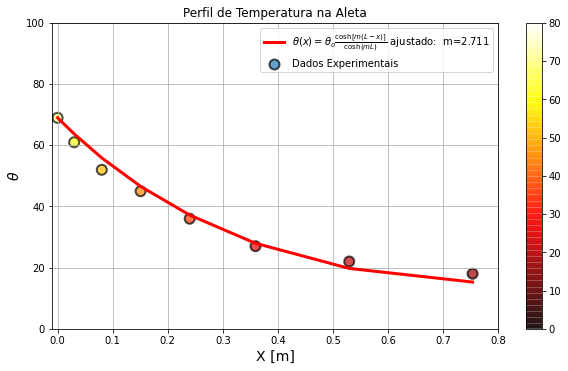

In [ ]:
# Gráfico comporativo Modelo vs. Dados
#tamanho da figura
plt.figure(figsize=(10, 5.625))

#tipo de gráfico ( dispersão de pontos - scatter)
plt.scatter(xm, ytheta, s=100, label = 'Dados Experimentais', c = ytheta, cmap ='hot', linewidth =2,alpha=0.7, edgecolors='black')        

# gráfico da curva do modelo ajustado (equação está escrita em código LATEX)
plt.plot(xm, modelo2(xm, *popt2), 'r-', label=r'$\theta\left(x\right)=\theta_{o}\frac{\cosh\left[m\left(L-x\right)\right]}{\cosh\left(mL\right)}$ ajustado:  m=%5.3f' % tuple(popt2), color='red',linewidth=3) 

# título do Gráfico
plt.title('Perfil de Temperatura na Aleta')

#limites dos eixos 
plt.xlim([-0.01, 0.8])
plt.ylim([-0.01, 100])

#título do eixo x 
plt.xlabel('X [m]', size=14)

#título do eixo y em LATEX 
plt.ylabel(r'$\theta$', size =14)

#mostrar linhas de grade
plt.grid()

#mostrar legenda no gráfico
plt.legend()

#barra do mapa de cor
plt.colorbar()

#limites dos valores a serem mostrados na barra de cor
plt.clim(0, 80)

#salvando uma figura
plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/Fig5_modelo2_ajustado.png',format='png', dpi=600, facecolor='white',transparent=False)

#mostre todos os elementos juntos agora!
plt.show()

In [ ]:
# os demais parâmetros já foram declarados no caso anterior!
#coeficiente médio de transferência de calor converctivo [W/m².K]

h2 = m2*m2*k*A/p

#impressão do resultado formatado
print("%.4f" %h2,'W/m².K')

5.5323 W/m².K


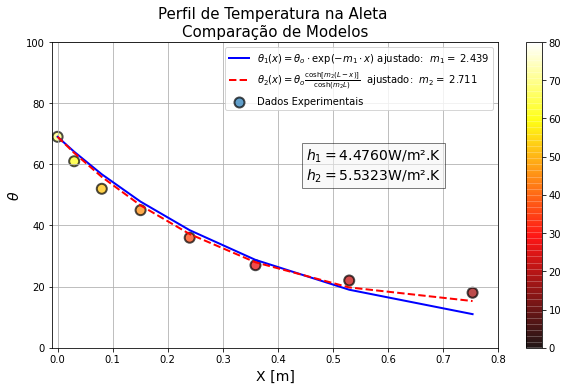

In [ ]:
# Gráfico comporativo Modelo1 vs. Modelo 2 vs. Dados
#tamanho da figura
plt.figure(figsize=(10, 5.625))

#tipo de gráfico ( dispersão de pontos - scatter)
plt.scatter(xm, ytheta, s=100, label = 'Dados Experimentais', c = ytheta, cmap ='hot', linewidth =2,alpha=0.7, edgecolors='black')        

#Curva do modelo ajustado Modelo 1
plt.plot(xm, modelo1(xm, *popt1), 'r-', label=r'$\theta_{1}\left(x\right)=\theta_{o}\cdot\exp\left(-m_{1}\cdot x\right)$ ajustado:  $m_{1}=$ %5.3f' % tuple(popt1), color='blue',linewidth=2) 

# gráfico da curva do modelo ajustado Modelo 2(equação está escrita em código LATEX)
plt.plot(xm, modelo2(xm, *popt2), linestyle='--',linewidth=2, label=r'$\theta_{2}\left(x\right)=\theta_{o}\frac{\cosh\left[m_{2}\left(L-x\right)\right]}{\cosh\left(m_{2}L\right)}$  ajustado:  $m_{2}=$ %5.3f'  % tuple(popt2), color='red') 

# título do Gráfico
plt.title('Perfil de Temperatura na Aleta \nComparação de Modelos', fontsize=15)

#limites dos eixos 
plt.xlim([-0.01, 0.8])
plt.ylim([-0.01, 100])

#título do eixo x 
plt.xlabel('X [m]', size=14)

#título do eixo y em LATEX 
plt.ylabel(r'$\theta$', size =14)

#mostrar linhas de grade
plt.grid()

#mostrar legenda no gráfico
plt.legend()

#barra do mapa de cor
plt.colorbar()

#limites dos valores a serem mostrados na barra de cor
plt.clim(0, 80)

#adicionando caixa de texto ao gráfico com os valores de h's obtidos para cada modelo
#há vários campos de formatação e conversão de número para texto, cor e posição da caixa de texto!
plt.text(0.45, 55, r'$h_{1}=$'+ str("%0.4f" % h1 ) +'W/m².K \n'r'$h_{2}=$'+ str("%0.4f" % h2 ) +'W/m².K ', fontsize = 14, bbox = dict(facecolor = 'whitesmoke', alpha = 0.5))

#salvando uma figura
plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/Fig6_Comparativo_de_modelos.png',format='png', dpi=600, facecolor='white',transparent=False)

#mostre todos os elementos juntos agora!
plt.show()